From: https://youtu.be/SEQbb8w7VTw

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
from datetime import datetime
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD (2).csv


In [ ]:
df = pd.read_csv('BTC-USD (2).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2554 entries, 0 to 2553
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2554 non-null   object 
 1   Open       2550 non-null   float64
 2   High       2550 non-null   float64
 3   Low        2550 non-null   float64
 4   Close      2550 non-null   float64
 5   Adj Close  2550 non-null   float64
 6   Volume     2550 non-null   float64
dtypes: float64(6), object(1)
memory usage: 139.8+ KB


In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2549,2021-09-09,45774.742188,47261.949219,45669.738281,46391.421875,46391.421875,3.867266e+10
2550,2021-09-10,46396.664063,47031.742188,44344.484375,44883.910156,44883.910156,3.915467e+10
2551,2021-09-11,44869.839844,45969.292969,44818.265625,45201.457031,45201.457031,3.449984e+10
2552,2021-09-12,45206.628906,46364.878906,44790.460938,46063.269531,46063.269531,2.788198e+10


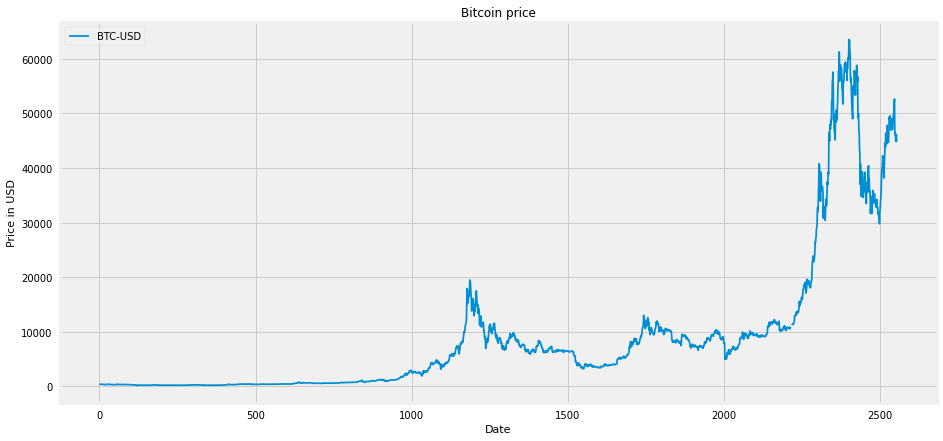

In [ ]:
# visualize the data
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn-notebook')
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='BTC-USD')
plt.title('Bitcoin price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Create Simple moving average without TA libraries

# Create new dataframe for SMA50
SMA50 = pd.DataFrame()
SMA50['Close'] = df['Close'].rolling(window=50).mean()
SMA50

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2549,44699.063516
2550,44950.479609
2551,45182.877734
2552,45418.294219


In [ ]:
# Create new dataframe for SMA200
SMA200 = pd.DataFrame()
SMA200['Close'] = df['Close'].rolling(window=200).mean()
SMA200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2549,46001.664199
2550,45955.047149
2551,45936.932305
2552,45918.721992


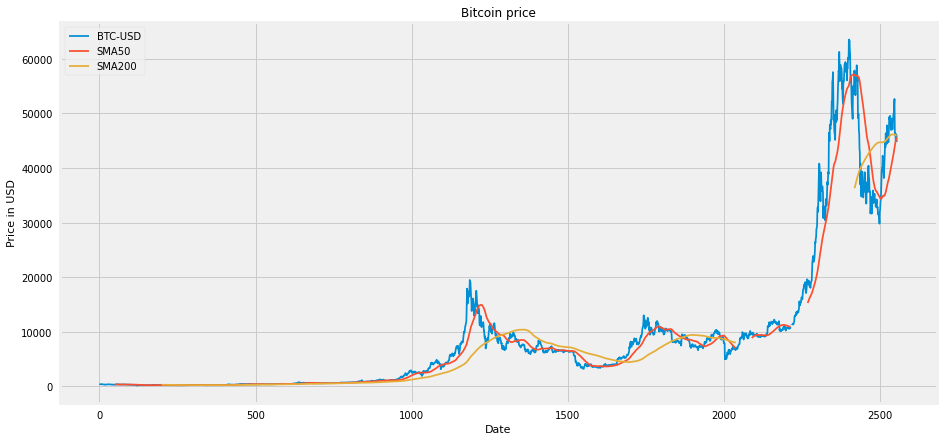

In [ ]:
# Add the two SMA datasets to the plot earlier to visualize
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn-notebook')
plt.figure(figsize=(14,7))

plt.plot(df['Close'], label='BTC-USD')
plt.plot(SMA50['Close'], label='SMA50')
plt.plot(SMA200['Close'], label='SMA200')

plt.title('Bitcoin price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Create new dataframe with information above
data = pd.DataFrame()
data['Close'] = df['Close']
data['sma50'] = SMA50['Close']
data['sma200'] = SMA200['Close']
data

,Close,sma50,sma200
0,457.334015,NaN,NaN
1,424.440002,NaN,NaN
2,394.795990,NaN,NaN
3,408.903992,NaN,NaN
4,398.821014,NaN,NaN
...,...,...,...
2549,46391.421875,44699.063516,46001.664199
2550,44883.910156,44950.479609,45955.047149
2551,45201.457031,45182.877734,45936.932305
2552,46063.269531,45418.294219,45918.721992


In [ ]:
# Create a function to signal when buy/sell signals arise
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['sma50'][i] > data['sma200'][i]:
      if flag != 1:
        sigPriceBuy.append(data['Close'][i])
        sigPriceSell.append(np.NaN)
        flag = 1
      else:
        sigPriceBuy.append(np.NaN)
        sigPriceSell.append(np.NaN)
    elif data['sma50'][i] < data['sma200'][i]:
      if flag != 0:
        sigPriceBuy.append(np.NaN)
        sigPriceSell.append(data['Close'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.NaN)
        sigPriceSell.append(np.NaN)
    else:
      sigPriceBuy.append(np.NaN)
      sigPriceSell.append(np.NaN)

  return(sigPriceBuy, sigPriceSell)

In [ ]:
# Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_signal_price'] = buy_sell[0] # Kijk naar pos 0 in de output van de functie
data['Sell_signal_price'] = buy_sell[1] # Kijk naar pos 1 in de output van de functie

In [ ]:
# Show the dataframe with the data
data

,Close,sma50,sma200,Buy_signal_price,Sell_signal_price
0,457.334015,NaN,NaN,NaN,NaN
1,424.440002,NaN,NaN,NaN,NaN
2,394.795990,NaN,NaN,NaN,NaN
3,408.903992,NaN,NaN,NaN,NaN
4,398.821014,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2549,46391.421875,44699.063516,46001.664199,NaN,NaN
2550,44883.910156,44950.479609,45955.047149,NaN,NaN
2551,45201.457031,45182.877734,45936.932305,NaN,NaN
2552,46063.269531,45418.294219,45918.721992,NaN,NaN


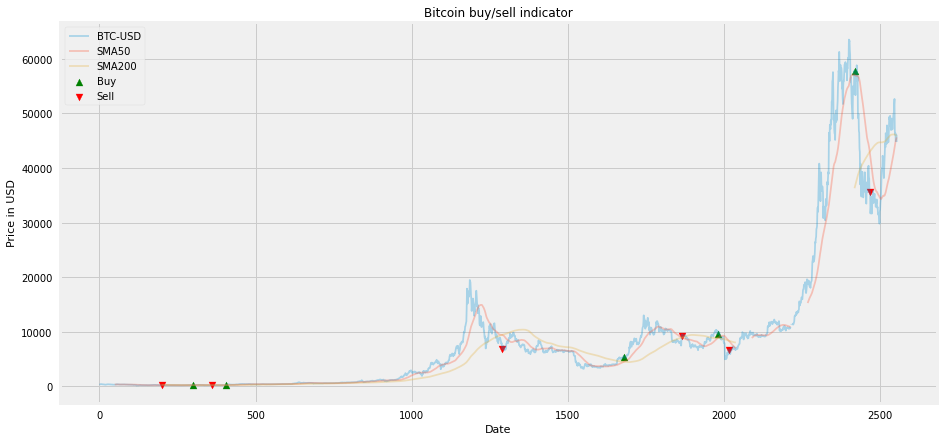

In [ ]:
# Wederom plotten van de resultaten voor controle
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn-notebook')
plt.figure(figsize=(14,7))

plt.plot(data['Close'], label='BTC-USD', alpha=0.3)
plt.plot(data['sma50'], label='SMA50', alpha=0.3)
plt.plot(data['sma200'], label='SMA200', alpha=0.3)

# Plot de output van buy signal en sell signal
plt.scatter(data.index, data['Buy_signal_price'], label='Buy', marker='^', color='green')
plt.scatter(data.index, data['Sell_signal_price'], label='Sell', marker='v', color='red')

plt.title('Bitcoin buy/sell indicator')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend(loc='upper left')
plt.show()